# 2 - Introductory Example: Ground Irradiance Analysis for AgriPV

This jupyter journal will walk us through the creation of the most basic fixed-tilt simulation possible with bifacialvf.
We will simulate a 1-up landscape system over a grass albedo and look at the ground irradiance from the start of 1 row to the other.


In [2]:
from pathlib import Path
import os
import bifacialvf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Experiment_2'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [ ]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'bold',
'size'   : 22}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)

In [12]:
# Variables

months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           
sazm = 180 #cycling through 3 different azimuths                 
albedo = 0.31  # Changed from 0.31 for test 6/9/22
x = 1
y = 2 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True
numpanels = 1
#xgap =  0.9144   
#nMods = 7
#ygap = .02 # Meters
#numpanels = 4
CW = y * numpanels
#CW = x + 2*xgap 

#Arrays for loops
tilts = [20,30]  
hub_heights = np.array([1,1.5,2,2.5]) 
GCRs = [0.28,0.33,0.4,0.6]
#Defaults
tilt_def = tilts[0]
hub_height_def = hub_heights[1]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def/CW
module_place = CW/GCR_def
 
# Tracking instructions
tracking=True
backtrack=True
limit_angle = 60





In [5]:
print(pitch_def,GCR_def)

3.0303030303030303 0.33


In [4]:
#Get weather file for Tuscon AZ
TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)
deltastyle = 'TMY3'

path = C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!


## Experiment for Hub height

In [14]:
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch_def, hub_height=hub_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.5   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_1.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:39<00:00, 88.25it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_1.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:58<00:00, 74.14it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_2.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [02:26<00:00, 59.68it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.25   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_HubHeight_2.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [04:07<00:00, 35.35it/s]

Finished


C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1283535156.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


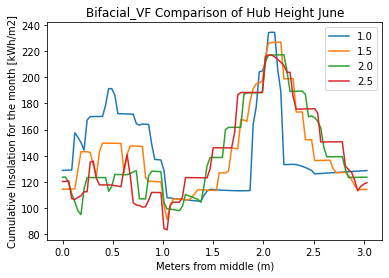

In [125]:
# Potential Times
# 2021-06-01 06:00:00-07:00, 2021-06-01 07:00:00-07:00, 2021-06-01 08:00:00-07:00, 2021-06-01 09:00:00-07:00, 2021-06-01 10:00:00-07:00
# 2021-06-01 11:00:00-07:00, 2021-06-01 12:00:00-07:00, 2021-06-01 13:00:00-07:00, 2021-06-01 14:00:00-07:00, 2021-06-01 15:00:00-07:00
# 2021-06-01 16:00:00-07:00, 2021-06-01 17:00:00-07:00 ,2021-06-01 18:00:00-07:00

plt.figure(1)
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    do = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    #Isolate rows without summing
    
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    Jun = df['Jun']
    #Split the column at the midpoint and bring the front data to the back. This is done to look at data between middle of rows
    # instead of from front edge to front edge
    splitfront = Jun.iloc[:33]
    splitback = Jun.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    graph = plt.plot(xaxis, full/1000, label=chreg)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF Comparison of Hub Height June')
    plt.xlabel('Meters from middle (m)')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend()

  

In [123]:
Jun

0     216807.957221
1     216857.888684
2     215450.968077
3     213459.461072
4     211414.022964
          ...      
95    188302.752686
96    188326.053511
97    188352.798768
98    188382.757817
99    215794.377844
Name: Jun, Length: 100, dtype: float64

C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1438986964.py:20: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


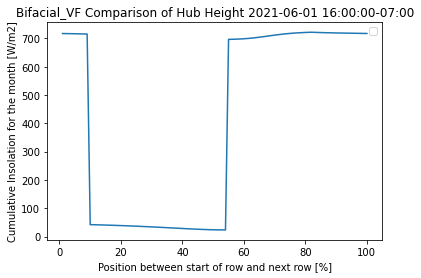

In [114]:
# Practice for splitting down data at middle and movin the front data to the back
times = ['2021-06-01 09:00:00-07:00','2021-06-01 15:00:00-07:00', '2021-06-01 16:00:00-07:00']
#Get tile from result file
tilt = 0
CW = 2
writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_1.5.csv')
#Load the results from the resultfile
from bifacialvf import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)
#Work with data in resultfile
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
date = times[2]
gg = groundIrrads.loc[date]
#Calculate midpoint. Use this to figure out where to split table. We'll split at row 33
mid = 0.5*CW*np.cos(tilt)
#will make two seperate tables from the split and then append front split to back split
splitfront = gg.iloc[:33]
splitback = gg.iloc[33:]
full = splitback.append(splitfront)
#create x axis
xstep = pitch_def/100
xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
plt.figure(1)
graph = plt.plot(x_axis, full)
#fig = (df['May']/1000).plot()
#Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
#fig.set_xlabel('Position between start of row and next row [%]')
#fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
#plt.axvspan(0, module_end, alpha=.05, color='green')
plt.title('Bifacial_VF Comparison of Hub Height '+date)
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [W/m2]')
plt.legend()

## Change Graph Data

C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)
C:\Users\jjones\AppData\Local\Temp\1\ipykernel_7684\1817353075.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = splitback.append(splitfront)


<function matplotlib.pyplot.show(close=None, block=None)>

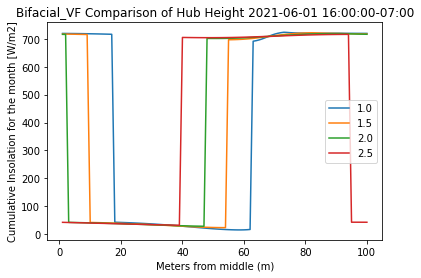

In [115]:
times = ['2021-06-01 09:00:00-07:00','2021-06-01 15:00:00-07:00', '2021-06-01 16:00:00-07:00']
#Get tile from result file
tilt = 0
CW = 2
plt.figure(1)
for hh in range (0, len(hub_heights)):
    #Build scene and run raytracing for all 3 azimuths
    chreg = hub_heights[hh]
    hub_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_HubHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    date = times[2]
    gg = groundIrrads.loc[date]
    #Calculate midpoint. Use this to figure out where to split table. We'll split at row 33
    mid = 0.5*CW*np.cos(tilt) #This midpoint is at 1m because the tilt is 0
    #will make two seperate tables from the split and then append front split to back split
    splitfront = gg.iloc[:33]
    splitback = gg.iloc[33:]
    full = splitback.append(splitfront)
    #create x axis
    xstep = pitch_def/100
    xaxis = np.linspace(0, pitch_def, num=100, endpoint=True)
    graph = plt.plot(x_axis, full, label=chreg)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF Comparison of Hub Height '+date)
    plt.xlabel('Meters from middle (m)')
    plt.ylabel('Cumulative Insolation for the month [W/m2]')
plt.legend()
plt.show
    

In [122]:
#Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    #do = groundIrrads.groupby([pd.Grouper(freq='H')]).sum().T
    #Isolate rows without summing
    
    #df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    #df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       #df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                  #df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    plt.figure(1)
    for time in times:
        gg = groundIrrads.loc[time]
        plt.plot(gg, label=time)
    plt.legend()   
    plt.show()
    
    #xstep = (len(do))
    x_axis = list(range(1,101))
    date = '2021-06-01 15:00:00-07:00'
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, do[date], label=chreg)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/module_place)*100 #Percentage between rows where the module ends)
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF Comparison of Hub Height '+date)
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [W/m2]')
    plt.legend()

IndentationError: unexpected indent (3656841046.py, line 2)

## Experiment for GCR

In [17]:
for gc in range (0, len(GCRs)):
        #Build scene and run raytracing for all 3 azimuths
    GCR = GCRs[gc]
    pitch = CW/GCR/CW
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, hub_height=hub_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

  

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.571428571428571   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.28.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.571428571428571
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:42<00:00, 85.87it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.33.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:42<00:00, 85.13it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.5   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.4.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.5
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.81it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  1.6666666666666667   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_GCR_0.6.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  0.6666666666666667
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:52<00:00, 77.94it/s]

Finished


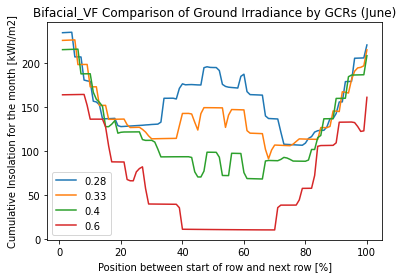

In [18]:
for gc in range (0, len(GCRs)):
        #Build scene and run raytracing for all 3 azimuths
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=GCR)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/pitch)*100 #Percentage between rows where the module ends)
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF Comparison of Ground Irradiance by GCRs (June)')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Compare VF and Radiance

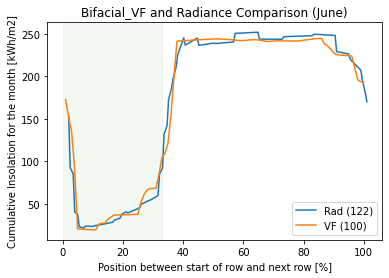

In [16]:
from bifacialvf import loadVFresults
VFfile = r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_20.csv'
(data, metadata) = loadVFresults(VFfile)
#Work with data in resultfile
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
#xstep = (len(data_line_f))
x_axis = list(range(1,101))
#x_axis_rad = np.linspace(0,100,xstep)

#fig = (df['May']/1000).plot()
#Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_tilt_20_Ground_Analysis_Front.csv'
(dataR, metadata) = loadVFresults(Radiance_File)
data_lineR = dataR#.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
data_line_fR = data_lineR[::-1].reset_index(drop = True)
data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
#Radirr = Radmin/ghitot
#VFirr = VFmin/ghitot
#Rad_irr_factor.append(Radirr)
#VF_irr_factor.append(VFirr)
#fig.set_xlabel('Position between start of row and next row [%]')
#fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
yshift = data_line_fR['y'] + 1
ystep = (yshift/6.06)*100
plt.figure(1)
Rad = plt.plot(ystep, data_line_fR['Wm2Front']/1000, label='Rad (122)')
VF = plt.plot(x_axis, df['Jun']/1000, label='VF (100)')
module_end = (2/module_place)*100 #Percentage between rows where the module ends)
plt.axvspan(0, module_end, alpha=.05, color='green')
plt.title('Bifacial_VF and Radiance Comparison (June)')
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend()

## Changing Transmission Factor

In [10]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)



2 2 0.0
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.63it/s]


Finished
2.1 2 0.04761904761904767
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.04761904761904767.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.03030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:53<00:00, 77.40it/s]


Finished
2.2 2 0.09090909090909094
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.09090909090909094.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:48<00:00, 80.89it/s]


Finished
2.3 2 0.13043478260869557
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.13043478260869557.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:46<00:00, 82.29it/s]


Finished
2.5 2 0.19999999999999996
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.19999999999999996.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.0303030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:51<00:00, 78.55it/s]


Finished
3 2 0.33333333333333337
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  1.0   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_2\Results_Test_TFactor_0.33333333333333337.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  2.03030303030303
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [04:13<00:00, 34.61it/s]

Finished


2 2 0.0
2.1 2 0.04761904761904767
2.2 2 0.09090909090909094
2.3 2 0.13043478260869557
2.5 2 0.19999999999999996
3 2 0.33333333333333337


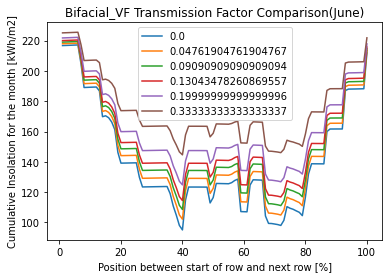

In [11]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')

    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=transFactor)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.title('Bifacial_VF Transmission Factor Comparison(June)')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

In [2]:
from bifacialvf import loadVFresults
writefile180 = os.path.join(testfolder,'Results_Test_Tilt_180.csv')
(data, metadata) = loadVFresults(writefile180)

URLError: <urlopen error unknown url type: c>

# 5. Analyze the results from the resultfile


In [ ]:
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)

In [ ]:
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)

In [42]:
print(df)

date            Jan           Feb            Mar            Apr  \
0     106804.350327  91094.913686  134161.226536  203721.855676   
1     106384.397730  90289.637640  133013.600099  199378.339094   
2     106052.451169  89520.013077  131917.123084  193469.847469   
3     105793.662375  88835.811066  130768.414234  178061.550709   
4     105585.170961  88183.695581  129566.185315  139554.867764   
..              ...           ...            ...            ...   
95    108527.989866  94975.236945  139769.179154  212826.472826   
96    108175.300811  94265.543506  138745.227880  212162.635670   
97    107919.815657  93505.528382  137652.809707  210769.341429   
98    107516.879801  92736.413970  136516.208756  208577.025222   
99    107118.152102  91917.065134  135338.199697  206245.989286   

date            May            Jun            Jul            Aug  \
0     204934.082339  184441.442684  169392.380183  172832.337806   
1     186802.449273  151353.467270  148570.116819  167173.4

In [ ]:
print(df.Jun.min())

## Bring in Corresponing data from Bifacial Radiance

In [ ]:
from bifacialvf import loadVFresults
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_May_az_180_Ground_Analysis_Front.csv'
(data2, metadata) = loadVFresults(Radiance_File)

In [ ]:
#Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
# file are (0,-1.825) to (0,4.625). This is rows 13222 through 13287 (65 points) in the excel file. Will isolate these rows
#data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                   #data2.columns[4]: "Wm2Front",}, inplace = True)
#print(data2)
data_line = data2.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
#data_line_f=np.flipud(data_line)
data_line_f = data_line[::-1].reset_index(drop = True) 
data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
#we're focused on later points.
print(data_line_f)
#print(data_line_f['Wm2Front'].min())

In [ ]:
xstep = (len(data_line_f))
x_axis = list(range(1,101))
x_axis_rad = np.linspace(0,100,xstep)
#print(x_axis_rad)
#print(x_axis)

In [ ]:
plt.figure(1)
VF = plt.plot(x_axis, df['May']/1000, label='VF')
#fig = (df['May']/1000).plot()
Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
#fig.set_xlabel('Position between start of row and next row [%]')
#fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.title('Comparison of Ground Irradiance Values for May az=180')
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend(handles=[VF[0], Radiance[0]])
#Q In bifacial Radiacne is (0,0) the middle of the module or the bottom edge

## Bar Plots of Irradiance Factors for each month

In [43]:
#data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
#data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
ghi = data['ghi'] #.str.strip('[]').str.split(' ', expand=True).astype(float)

In [44]:
dates = ['May','Jun','Jul','Aug','Sep','Oct']
dghi = ghi.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
print(dghi)
#dghi.rename(columns={ dghi.rows[0]: "Jan", dghi.columns[1]: "Feb",dghi.columns[2]: "Mar", dghi.columns[3]: "Apr",
                   #dghi.columns[4]: "May",dghi.columns[5]: "June",dghi.columns[6]: "July",dghi.columns[7]: "Aug",
                   #dghi.columns[8]: "Sept",dghi.columns[9]: "Oct",dghi.columns[10]: "Nov",dghi.columns[11]: "Dec"    }, inplace = True)

date
2021-01-31 00:00:00-07:00    117026.170036
2021-02-28 00:00:00-07:00    101592.549169
2021-03-31 00:00:00-07:00    148849.908263
2021-04-30 00:00:00-07:00    220098.947497
2021-05-31 00:00:00-07:00    246039.847708
2021-06-30 00:00:00-07:00    250162.614211
2021-07-31 00:00:00-07:00    210202.106113
2021-08-31 00:00:00-07:00    193593.260574
2021-09-30 00:00:00-07:00    153746.217164
2021-10-31 00:00:00-07:00    145113.887870
2021-11-30 00:00:00-07:00    110458.418624
2021-12-31 00:00:00-07:00    102666.306768
Freq: M, Name: ghi, dtype: float64


In [45]:
Rad_irr_factor=[]
VF_irr_factor=[]
for ti in range (0, len(dates)):
    month = dates[ti]
    ghitot = dghi[ti+5]
    #Min for VF data
    VFmin = df[month].min() 
    #Min for Radiance data
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_'+month+'_az_180_Ground_Analysis_Front.csv'
    (dataR, metadata) = loadVFresults(Radiance_File)
    data_lineR = dataR #.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line_fR = data_lineR[::-1].reset_index(drop = True)
    data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
    Radmin =  data_line_fR['Wm2Front'].min()
    Radirr = Radmin/ghitot
    VFirr = VFmin/ghitot
    Rad_irr_factor.append(Radirr)
    VF_irr_factor.append(VFirr)

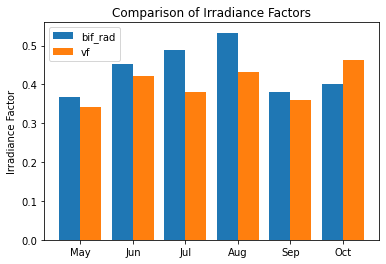

In [46]:
dates_e = ['May','Jun','Jul','Aug','Sep','Oct','Nov']
x_axis = np.arange(len(dates))
# Multi bar Chart
plt.bar(x_axis -0.2, Rad_irr_factor, width=0.4, label = 'bif_rad')
plt.bar(x_axis +0.2, VF_irr_factor, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

In [ ]:
VF_all =  VF_irr_factor
VF_all.append(df['Nov'].min()/dghi[10])
VF_all.append(df['Dec'].min()/dghi[11])
VF_all.insert(0,df['Apr'].min()/dghi[3])
VF_all.insert(0,df['Mar'].min()/dghi[2])
VF_all.insert(0,df['Feb'].min()/dghi[1])
VF_all.insert(0,df['Jan'].min()/dghi[0])
print(VF_all)
dates_e = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_axis = np.arange(len(dates_e))
# Multi bar Chart
plt.bar(x_axis, VF_all, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates_e)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

In [ ]:
monthlyGHI = pd.DataFrame(data['ghi'].groupby([pd.Grouper(freq='M')]).sum())

In [ ]:
monthlyGHI['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
monthlyGHI.set_index(monthlyGHI['Month'], inplace=True)
monthlyGHI = monthlyGHI.drop(columns='Month')

In [ ]:
print(monthlyGHI)

In [ ]:
df_norm = df.T
df_norm = df_norm.div(monthlyGHI['ghi'], axis=0)
df_norm = df_norm.T

In [ ]:
fig = (df_norm).plot()
fig.set_xlabel('Position between start of row and next row [%]')
fig.set_ylabel('Normalized Insolation for the month/GHI')